# Minimum Spanning Trees
(최소신장트리)

### 프림 알고리즘
- 시작점을 집합 S에 포함시킨다
- 집합 S로부터 가장 가까운 노드를 S로 추가해 나간다

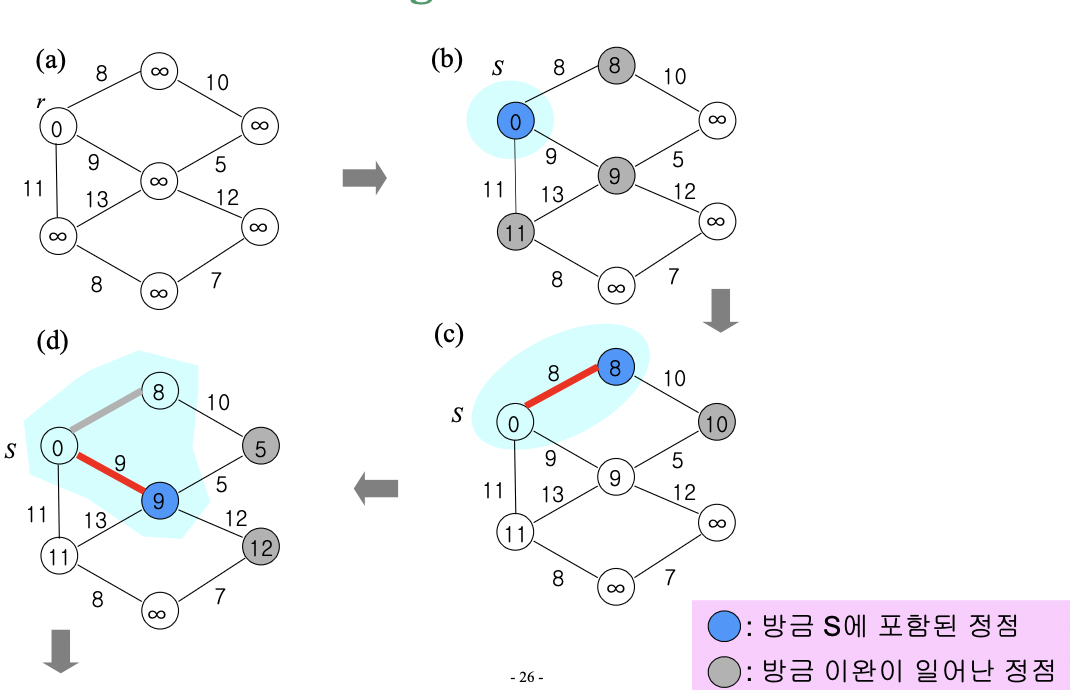

In [2]:
mywgraph = { "A" : {"B":8,  "C":11, "D":9},
      "B" : {"A": 11, "E":10},
      "C" : {"A":11, "D":13, "F":8},
      "D" : {"A":9,  "C":13, "E":5, "G":12},
      "E" : {"B":10, "D":5},
      "F" : {"C":8,  "G":7},
      "G" : {"D":12, "F":7}
      }

In [13]:
import sys

def prim(G, node):
  S = set()
  S.add(node)
  connection = [] # 로직 구현에는 없어도 되긴 함

  while len(S) < len(G.keys()):
    start, end, min = get_min_edge(S, G)
    S.add(end) # end가 곧 추가된 순서
    connection.append([start, end, min])

  return connection

def get_min_edge(S, G): # S-G의 가장 가까운 노드와 그 길이를 return (이완)
  min = sys.maxsize
  for s in S:
    adj_nodes = G[s] # s와 가까운 노드들
    for adj_node in adj_nodes:
      if adj_node not in S: # S 집합에는 포함되지 않아야 함
        cost = adj_nodes[adj_node]
        if cost < min:
          min = cost
          start = s
          end = adj_node
  return start, end, min
        

print(prim(mywgraph, 'A'))

[['A', 'B', 8], ['A', 'D', 9], ['D', 'E', 5], ['A', 'C', 11], ['C', 'F', 8], ['F', 'G', 7]]


### 크루스칼(Kruskal) 알고리즘
- 노드를 각각의 집합으로 초기화한다 (n개 노드->n개 집합)
- 간선(edge)을 거리가 최소인 순서대로 제거한다
- 해당 간선의 시작,끝 노드를 하나의 집합으로 합친다 (서로 다른 집합이라면)

In [12]:
def Kruskal(G):
  S = [set(node) for node in G.keys()]
  edges = get_sorted_edges(G)
  
  while len(S) > 1:
    print(S)
    edge = edges.pop()
    start, end = edge[0]
    start_set = None
    end_set = None

    for s in S:
      if start in s : start_set = s
      if end in s : end_set = s
      if start_set is not None and end_set is not None:
        if end not in start_set: # end가 포함이 안되어 있다면
          S.remove(start_set)
          S.remove(end_set)
          S.append(start_set.union(end_set)) # start에 합친다
        break

  return S

def get_sorted_edges(G): # 내림차순(reverse=True)
  E = {}
  for start in G.keys():
    for end in G[start]:
      E[frozenset([start, end])] = G[start][end] # key로 쓰기 위해 frozenset
  E_items = list(E.items()) # (key,value) 리스트로 만듦
  E_items.sort(key=lambda x:x[1], reverse=True)

  return E_items

Kruskal(mywgraph)
  

[{'A'}, {'B'}, {'C'}, {'D'}, {'E'}, {'F'}, {'G'}]
[{'A'}, {'B'}, {'C'}, {'F'}, {'G'}, {'D', 'E'}]
[{'A'}, {'B'}, {'C'}, {'D', 'E'}, {'G', 'F'}]
[{'A'}, {'B'}, {'D', 'E'}, {'G', 'C', 'F'}]
[{'B'}, {'G', 'C', 'F'}, {'A', 'D', 'E'}]
[{'G', 'C', 'F'}, {'B', 'A', 'D', 'E'}]


[{'A', 'B', 'C', 'D', 'E', 'F', 'G'}]